In [30]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_excel('../data/BBDD.xlsx')

In [32]:
df.head()

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [33]:
df

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo
...,...,...,...,...
49995,I thought this movie did a down right good job...,Pensé que esta película hizo un buen trabajo a...,positive,positivo
49996,"Bad plot, bad dialogue, bad acting, idiotic di...","Mala parcela, mal diálogo, mala actuación, dir...",negative,negativo
49997,I am a Catholic taught in parochial elementary...,Soy católica enseñada en escuelas primarias pa...,negative,negativo
49998,I'm going to have to disagree with the previou...,Voy a tener que estar en desacuerdo con el com...,negative,negativo


In [34]:
df = df[['sentimiento', 'review_es']].copy()

In [35]:
df.head()

,sentimiento,review_es
0,positivo,Uno de los otros críticos ha mencionado que de...
1,positivo,Una pequeña pequeña producción.La técnica de f...
2,positivo,Pensé que esta era una manera maravillosa de p...
3,negativo,"Básicamente, hay una familia donde un niño peq..."
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una..."


<Axes: >

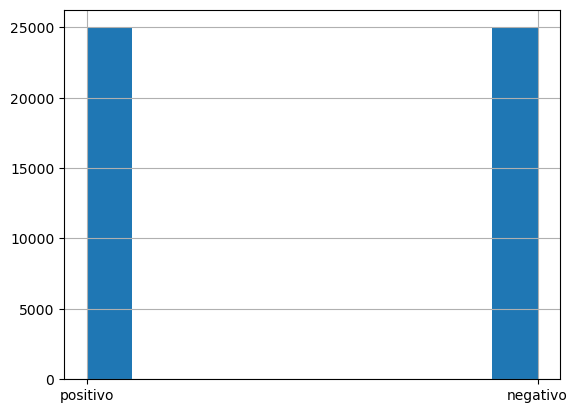

In [36]:
df['sentimiento'].hist()

In [37]:
target_map = {'positivo': 1, 'negativo': 0}
df['target'] = df['sentimiento'].map(target_map)

In [38]:
df.head()

,sentimiento,review_es,target
0,positivo,Uno de los otros críticos ha mencionado que de...,1
1,positivo,Una pequeña pequeña producción.La técnica de f...,1
2,positivo,Pensé que esta era una manera maravillosa de p...,1
3,negativo,"Básicamente, hay una familia donde un niño peq...",0
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una...",1


In [39]:
df_train, df_test = train_test_split(df)

In [40]:
df_train

,sentimiento,review_es,target
21404,negativo,Recientemente tuve que ver esto para un proyec...,0
19829,negativo,No hay razones para ver esta película.Si ha ga...,0
17885,positivo,La película Hagacard es una de las películas m...,1
12780,negativo,Esta película se trata de una fiesta juntada p...,0
11434,negativo,Mal hechoTreadful actuando y un final que el D...,0
...,...,...,...
52,positivo,Bela Lugosi apareció en varias de estas enfria...,1
2812,negativo,Esta película cuenta con un O.K.Puntuación y u...,0
11580,positivo,La matanza alta es sobre un niño llamado Marty...,1
20708,negativo,Hay algo triste por ver a alguien que es tan b...,0


In [41]:
df_test

,sentimiento,review_es,target
29104,negativo,He visto casi todas las películas de Kurosawa ...,0
3181,negativo,¡Es el moooooullltakaaaa! Wow.Qué piel pelando...,0
20834,negativo,¿Cómo puede Barry Levinson posiblemente ensamb...,0
27420,negativo,Algunos de los cineastas que participan en est...,0
27930,positivo,"Por supuesto, estoy un poco prejuiciado, pero ...",1
...,...,...,...
22957,negativo,"Cuando vi el póster en el teatro, pensé que es...",0
26847,positivo,Vale la pena deshacerse del panteón hindú ante...,1
11033,positivo,Zentropa tiene mucho en común con el tercer ho...,1
34604,negativo,Mis amigos y yo a menudo hemos bromizado sobre...,0


In [42]:
vectorizer = TfidfVectorizer(max_features=2000)

In [43]:
X_train = vectorizer.fit_transform(df_train['review_es'])
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3463814 stored elements and shape (37500, 2000)>

In [44]:
X_test = vectorizer.transform(df_test['review_es'])
X_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1155532 stored elements and shape (12500, 2000)>

In [45]:
Y_train = df_train['target']
Y_test = df_test['target']

In [46]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8794133333333334
Test acc: 0.86192


In [47]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [48]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.87022779, 0.12977221],
       [0.11131944, 0.88868056]])

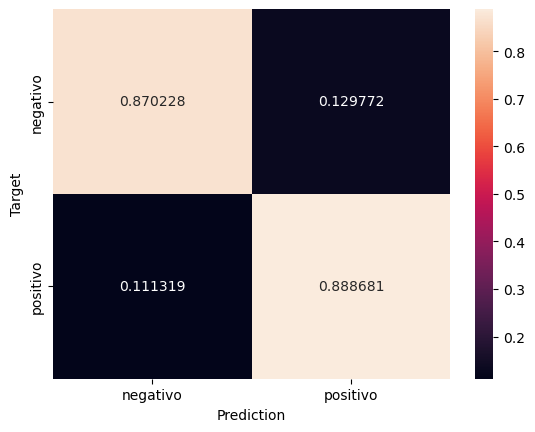

In [49]:
def plot(cm):
    classes = ['negativo', 'positivo']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Prediction")
    ax.set_ylabel("Target")

plot(cm)

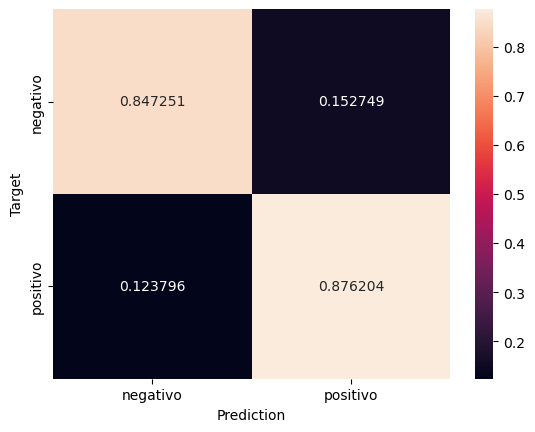

In [50]:
cm = confusion_matrix(Y_test, P_test, normalize='true')
plot(cm)

In [51]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'recientemente': np.int64(1541),
 'tuve': np.int64(1859),
 'que': np.int64(1510),
 'ver': np.int64(1909),
 'esto': np.int64(681),
 'para': np.int64(1336),
 'un': np.int64(1871),
 'proyecto': np.int64(1487),
 'en': np.int64(585),
 'una': np.int64(1872),
 'clase': np.int64(312),
 'de': np.int64(437),
 'pensé': np.int64(1369),
 'era': np.int64(618),
 'absolutamente': np.int64(21),
 'la': np.int64(1024),
 'peor': np.int64(1372),
 'película': np.int64(1363),
 'he': np.int64(864),
 'tenido': np.int64(1771),
 'como': np.int64(337),
 'mala': np.int64(1099),
 'cine': np.int64(304),
 'con': np.int64(350),
 'todos': np.int64(1821),
 'los': np.int64(1077),
 'buenos': np.int64(224),
 'bits': np.int64(201),
 'actuación': np.int64(39),
 'el': np.int64(570),
 'documental': np.int64(536),
 'falso': np.int64(729),
 'parcela': np.int64(1337),
 'sin': np.int64(1680),
 'sentido': np.int64(1640),
 'dirección': np.int64(508),
 'se': np.int64(1617),
 'hacer': np.int64(849),
 'terrible': np.int64(1782),
 'per

In [52]:
corte = 4

print('Palabras mas positivas')
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > corte:
        print(word, weight)

Palabras mas positivas
gran 4.155184537218102
perfecto 4.444302879443074
definitivamente 4.145586545820259
brillante 4.099396010213664
excelentes 4.5221866119538285
excelente 7.901492120574389
disfruté 4.275831795113679
hilarante 4.134718047108031
maravillosa 4.2339631628647165
encantó 5.052107833863068
hoy 4.386159930715688


In [53]:
print('Palabras mas Negativas')
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > -corte:
        print(word, weight)

Palabras mas Negativas
recientemente 0.8778324323171762
tuve -0.20610175288609017
que -0.14259346923382404
ver -0.3335827059620478
esto -1.7737097678236151
para -0.7161262002128784
un -0.06742385976631719
proyecto -1.3621636517444469
en 0.03537274282073684
una 0.3736739482742641
clase 0.10771897602512127
de -1.1589713800943255
pensé 1.056778294269421
era -0.5396438606865678
absolutamente -1.0443820469474228
la 1.0276039367912027
película -0.021648716704637555
he 0.859437861226994
tenido -0.12944131354789057
como -0.1642396842437578
cine 0.9646480123785369
con 0.2515013331234468
todos 2.418446009847915
los 0.30674348756832
buenos 0.5974264640641015
bits -0.44185199966314165
actuación -1.127188827929391
el 0.13269095910538234
documental 1.2323983530859839
falso -1.6983468420847379
parcela -2.326819873153054
sin -1.4675791372745663
sentido -1.5921475661045943
dirección -1.1610328052754364
se -1.0399858776889621
hacer -2.5308791672636124
personajes -0.38520641988722426
son -0.4047603420910

(array([  1.,   1.,   0.,   0.,   0.,   3.,   1.,   1.,   3.,   3.,   7.,
         23.,  18.,  49.,  82., 207., 435., 507., 371., 167.,  58.,  28.,
         19.,   9.,   5.,   1.,   0.,   0.,   0.,   1.]),
 array([-10.72470183, -10.1038287 ,  -9.48295556,  -8.86208243,
         -8.2412093 ,  -7.62033617,  -6.99946304,  -6.37858991,
         -5.75771677,  -5.13684364,  -4.51597051,  -3.89509738,
         -3.27422425,  -2.65335112,  -2.03247799,  -1.41160485,
         -0.79073172,  -0.16985859,   0.45101454,   1.07188767,
          1.6927608 ,   2.31363394,   2.93450707,   3.5553802 ,
          4.17625333,   4.79712646,   5.41799959,   6.03887273,
          6.65974586,   7.28061899,   7.90149212]),
 <BarContainer object of 30 artists>)

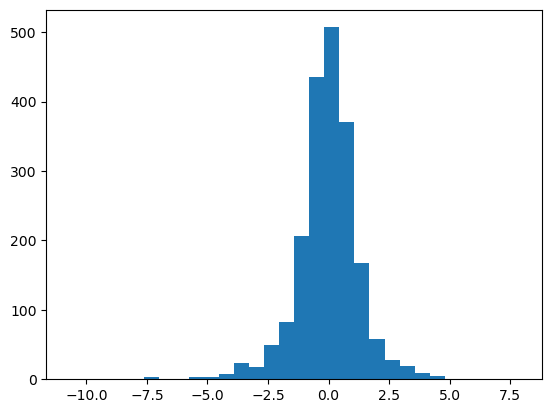

In [54]:
plt.hist(model.coef_[0], bins=30)

In [55]:
prueba = ['estuvo muy entretenida la pelicula', 'estuvo terrible la pelicula, me aburrio mucho', 'no la recomiendo']

x = vectorizer.transform(prueba)

In [56]:
P = model.predict(x)

In [57]:
clases = model.classes_

In [58]:
for i in range(len(prueba)):
    if clases[P_train[i]] == 0:
        print(f'El comentario: "{prueba[i]}" es: Negativo')
    else:
        print(f'El comentario: "{prueba[i]}" es: Positivo')

El comentario: "estuvo muy entretenida la pelicula" es: Negativo
El comentario: "estuvo terrible la pelicula, me aburrio mucho" es: Negativo
El comentario: "no la recomiendo" es: Positivo
